
# **Gestión de datos y datos digitales**
### **Autor: Ferran Carrascosa Mallafrè**

---
---

<!-- script html for image -->

<center>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/c/c9/Star_Wars%2C_%C3%A9pisode_III_-_La_Revanche_des_Sith_logo.jpg/220px-Star_Wars%2C_%C3%A9pisode_III_-_La_Revanche_des_Sith_logo.jpg"  width="500" height="150"/>


<br>

Fuente de la imagen: [https://es.wikipedia.org](https://es.wikipedia.org/wiki/Star_Wars:_Episodio_III_-_La_venganza_de_los_Sith)

</center>

<br>

# **Índice**

---
---

> [Gestión de datos y datos digitales](#scrollTo=eJfiC-K0VViA&uniqifier=1)
<br>
>>
>> [Preparación del Entorno](#scrollTo=UkU8akIVtlbn&line=1&uniqifier=1) \\
>>   \\
>> [1.4. Social analytics: Hootsuite, Twitter analytics y Facebook insights](#scrollTo=U3oTMspTVVjE) \\
>>
>>> [1.4.1 Twitter analytics](#scrollTo=lsAECn4Bbkil&uniqifier=1) \\
>>>
>>> [1.4.2. Facebook insights](#scrollTo=921VyHG6bki3&uniqifier=1) \\
>>>
>>> [1.4.3. Hootsuite](#scrollTo=DHP_jCRpbki6&uniqifier=1)


# Preparación del entorno

Cargamos las librerías.

In [ ]:
import json
import pymongo
import tweepy
import urllib
import time


# 1.4. Social analytics: Hootsuite, Twitter analytics y Facebook insights





## 1.4.1 Twitter analytics

Para obtener datos de Twitter des de Python se puede utilizar su propia API.

Por ejemplo: 

```
https://api.twitter.com/oauth/authenticate?oauth_token=XXXXXXXXXXXXXX

https://api.twitter.com/1.1/followers/ids.json?cursor=-1&screen_name=my_user_name&count=5000
```

Construir estas consultas, no siempre es fácil. Puede consultar la API completa en https://developer.twitter.com/en/docs/api-reference-index . Una forma de facilitar estas consultas es utilizar la librería **tweepy**. 


### Autenticación

Para conectarse a la  API  de Twitter (de tipo RESTful), es necesario autenticarse. Para obtener los datos necesarios se pueden seguir los siguientes pasos:

- Accede a la siguiente url: https://apps.twitter.com  e identifícate con tus credenciales de twitter (si no las tienes, entonces ha llegado el momento de abrirte una cuenta).
- Crea una nueva App. Esto creara las claves API (consumer_key y consumer_secret)
- Ve a la API Key y genera un token. (access_key y access_secret)


In [ ]:

consumer_key = "XXXXXXXXXXXXXXXXXXX"
consumer_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"

access_key = "XXXXXXXXXXXXXXXXXXXXXXXX"
access_secret = "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"


Ahora se autentica en Twitter.

In [ ]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

### Consulta del perfil de un usuario


Verificamos que la api devuelve resultados consultando el perfil de twitter: @PyLadiesBCN .

In [ ]:
USER_NAME = "PyLadiesBCN"
user = api.get_user(id=USER_NAME)

El nombre.

In [ ]:
user.screen_name

'PyLadiesBCN'

El id.

In [ ]:
user.id

2355227816

La fecha de creación del perfil.

In [ ]:
user.created_at

datetime.datetime(2014, 2, 21, 19, 15, 16)

El número de perfiles que está siguiendo.

In [ ]:
user.friends_count

268

El número de seguidores de este perfil.

In [ ]:
user.followers_count

1167

Todo el json del perfil del usuario.

In [ ]:
user._json

{'contributors_enabled': False,
 'created_at': 'Fri Feb 21 19:15:16 +0000 2014',
 'default_profile': False,
 'default_profile_image': False,
 'description': 'pyladies-bcn@googlegroups.com',
 'entities': {'description': {'urls': []},
  'url': {'urls': [{'display_url': 'meetup.com/PyLadies-BCN/',
     'expanded_url': 'http://www.meetup.com/PyLadies-BCN/',
     'indices': [0, 22],
     'url': 'http://t.co/30EZOFGXXX'}]}},
 'favourites_count': 287,
 'follow_request_sent': False,
 'followers_count': 1167,
 'following': False,
 'friends_count': 268,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 2355227816,
 'id_str': '2355227816',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': None,
 'listed_count': 59,
 'location': 'Barcelona',
 'name': 'PyLadies_BCN',
 'notifications': False,
 'profile_background_color': 'C7223D',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twim


Se puede acceder a la información en json como si se tratara de un diccionario.


In [ ]:
juser = user._json
print(juser['created_at'])

Fri Feb 21 19:15:16 +0000 2014


Además, a través de urllib se puede recuperar más información de interés, como la imagen del perfil.

In [ ]:
img_url = juser['profile_image_url']
print(img_url)

http://pbs.twimg.com/profile_images/1230435421299118081/xT8Na4ic_normal.jpg


Guardamos la imagen en un fichero y la printamos en el notebook.

Text(0.5, 1.0, 'PyLadiesBCN')

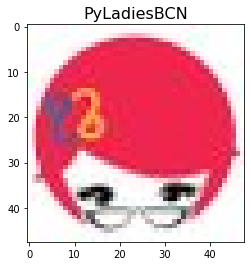

In [ ]:
f = open('scraped_image','wb')
f.write(urllib.request.urlopen(img_url).read())
f.close()

%matplotlib inline
import matplotlib.pyplot as plt
im=plt.imread('scraped_image')
plt.imshow(im)
plt.title(juser['screen_name'],size=16)

### Consulta de los seguidores de un usuario

Para obtener la lista de los ids de los seguidores, se puede utilizar la función `api.followers_ids`. 

La función retorna un máximo de 5.000 ids. Si queremos obtener la lista completa, se puede utilizar un objeto `Cursor` con el método `pages`. De esta forma, se recorre las distintas paginas de forma implicita.

Recuperando todos los seguidores de @pyladies. Si cambias a un perfil con muchos followers, piensa que puede tardar una eternidad, debido a que hay que aplicar un tiempo de espera de 60 segundos entre consulta y consulta.

In [ ]:
ids = []
for page in tweepy.Cursor(api.followers_ids, screen_name=USER_NAME).pages():
    ids.extend(page)
    if len(page)>=5000:
        time.sleep(60)
    
len(ids)

1167

> *Importante*: El comando `sleep` es necesario para respetar el ratio máximo de descargas de la API de twitter.

In [ ]:
#friends (screen_name) or follower_ids
ids[0:10]

[1363419843576397824,
 272542911,
 2497796652,
 1283027929451188225,
 43605449,
 851468308377456644,
 102926149,
 332138564,
 1250881335557861376,
 424528816]

Ahora Guardamos los datos de los ids en MongoDB.

Para esto, conectamos a MongoDB, creamos la base 'twitter' y Collection 'twitter_users'.


In [ ]:
document={}
document['user'] = user.id
document['followers'] = ids[:]

# Create the connection to MongoDB
try:
    conn=pymongo.MongoClient()
    print("Connection to Mongo Daemon successful!!!")
except pymongo.errors.ConnectionFailure:
    print("Could not connect to MongoDB")

db = conn['twitter']
collection = db['twitter_users']
# collection.drop()
collection.insert_one(document)

Connection to Mongo Daemon successful!!!


In [ ]:
collection.estimated_document_count()

1

In [ ]:
doc = collection.find_one()

In [ ]:
doc['user']

2355227816

In [ ]:
doc['followers'][0:10]

[1363419843576397824,
 272542911,
 2497796652,
 1283027929451188225,
 43605449,
 851468308377456644,
 102926149,
 332138564,
 1250881335557861376,
 424528816]

### Streaming API

Para escuchar los tweets que cumplen un cierto filtro, en tiempo real, se puede utilizar la **Streaming API**. Esta funciona solicitando un tipo específico de datos, filtrados por palabra clave, usuario, área geográfica o una muestra aleatoria, y luego mantiene la conexión abierta, siempre que no haya errores en la conexión. Los datos que recupere se codifican en JSON.

El componente clave de eso es el objeto StreamListener, que monitorea los tweets en tiempo real y los captura.

Si revisamos la API de transmisión de Twitter oficial, vemos que tenemos varios modificadores para filtrar la transmisión, es decir, rastrear (filtrar por palabra clave), ubicaciones (filtrar por ubicación geográfica), etc.

StreamListener tiene varios métodos, siendo on_data() y on_status() los más útiles. Aquí hay un script de muestra que implementa este comportamiento

En primer lugar, se define una clase que nos permite implementar los métodos on_data y on_error.


In [ ]:
from tweepy import Stream,StreamListener

class listener(StreamListener):
    def __init__(self):
        super().__init__()
        self.counter = 0
        self.limit = 5
    def on_data(self, status):
        json_data=json.loads(status)
        print(str(json_data["user"]["screen_name"])+' : ' + json_data["text"])
        self.counter += 1
        if self.counter < self.limit:
            return True
        else:
            twitterStream.disconnect()
    def on_error(self, status):
        print(status)

A continuación monitoreamos los tweets realizados des del área de Barcelona.

> Sabías que: Para obtener las coordenadas del rectángulo que cubre una zona, puedes utilizar: http://boundingbox.klokantech.com

Observa que se ha limitado el número de tweets recuperar a 2 para obligar a que el Stream se pare sólo.


In [ ]:
twitterStream = Stream(auth, listener()) 
twitterStream.filter(locations=[2.0504377635,41.2787636541,2.3045074059,41.4725622346],)


{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Feb 21 22:58:33 +0000 2021",
    "display_text_range": [
        12,
        22
    ],
    "entities": {
        "hashtags": [],
        "symbols": [],
        "urls": [],
        "user_mentions": [
            {
                "id": 1004757632,
                "id_str": "1004757632",
                "indices": [
                    0,
                    11
                ],
                "name": "\ud83d\udc7c\ud83c\udffc",
                "screen_name": "ktalnieto_"
            }
        ]
    },
    "favorite_count": 0,
    "favorited": false,
    "filter_level": "low",
    "geo": null,
    "id": 1363624178751012865,
    "id_str": "1363624178751012865",
    "in_reply_to_screen_name": "ktalnieto_",
    "in_reply_to_status_id": 1363617902407131136,
    "in_reply_to_status_id_str": "1363617902407131136",
    "in_reply_to_user_id": 1004757632,
    "in_reply_to_user_id_str": "1004757632",
    "is_quote_status

In [ ]:
# Other examples
twitterStream = Stream(auth, listener()) 
twitterStream.filter(track=["python"])


{
    "contributors": null,
    "coordinates": null,
    "created_at": "Sun Feb 21 23:00:27 +0000 2021",
    "entities": {
        "hashtags": [
            {
                "indices": [
                    66,
                    73
                ],
                "text": "python"
            },
            {
                "indices": [
                    74,
                    85
                ],
                "text": "developers"
            },
            {
                "indices": [
                    86,
                    97
                ],
                "text": "javascript"
            },
            {
                "indices": [
                    98,
                    114
                ],
                "text": "cross_plattform"
            },
            {
                "indices": [
                    115,
                    128
                ],
                "text": "data_science"
            }
        ],
        "symbols": [],
        "ur


Vemos ahora como guardar estos tweets en MongoDB database.

Subimos el límite a 10 tweets.


In [ ]:
from tweepy import Stream,StreamListener

class listener(StreamListener):
    def __init__(self):
        super(StreamListener, self).__init__()
        try:
            self.conn=pymongo.MongoClient()
            print("Connection to Mongo Daemon successful!!!")
        except pymongo.errors.ConnectionFailure:
            print("Could not connect to MongoDB")
        self.db = conn['twitter_stream']
        self.collection = db['tweets']
        self.counter = 0
        self.limit = 10
    
    def on_data(self, status):
        jdata = json.loads(status)
        document={'text':jdata["text"], 'created':jdata["created_at"], 'screen_name':jdata["user"]["screen_name"]}        
        self.collection.insert_one(document) 
        self.counter += 1
        if self.counter < self.limit:
            return True
        else:
            twitterStream.disconnect()
    
    def on_error(self, status):
        print(status)

# Captura 10 tweets del area de Barcelona
twitterStream = Stream(auth, listener()) 
twitterStream.filter(track=["trump"])


Connection to Mongo Daemon successful!!!


In [ ]:
#Check captured data
try:
    conn=pymongo.MongoClient()
    print("Connection to Mongo Daemon successful!!!")
except pymongo.errors.ConnectionFailure:
    print("Could not connect to MongoDB")

db = conn['twitter_stream']
collection = db['tweets']
collection.estimated_document_count()

Connection to Mongo Daemon successful!!!


10

In [ ]:
for doc in collection.find():
    print(doc)

{'_id': ObjectId('6032ed77db0d29c88065d873'), 'text': 'RT @real_Jukon: Remember to Trump Sen. ....... https://t.co/CcSRDXOFbY', 'created': 'Sun Feb 21 23:32:01 +0000 2021', 'screen_name': 'real_Jukon'}
{'_id': ObjectId('6032ed77db0d29c88065d874'), 'text': 'RT @MaryLTrump: Excellent, enraging, essential read from @Laurie_Garrett \n\nhttps://t.co/Ji55bRL7mD', 'created': 'Sun Feb 21 23:32:01 +0000 2021', 'screen_name': 'Mimmle'}
{'_id': ObjectId('6032ed77db0d29c88065d875'), 'text': 'RT @ChrisCuomo: Are there enough republicans to make this happen? https://t.co/8vW7ZoQ5nW', 'created': 'Sun Feb 21 23:32:01 +0000 2021', 'screen_name': 'realandyj'}
{'_id': ObjectId('6032ed77db0d29c88065d876'), 'text': 'The media should absolutely destroy her for incompetence. They destroyed a group of much more competent people just… https://t.co/0DXVx30gr3', 'created': 'Sun Feb 21 23:32:01 +0000 2021', 'screen_name': 'Maga4Life14'}
{'_id': ObjectId('6032ed77db0d29c88065d877'), 'text': 'RT @TX_WalkerRanger: T

El API en tiempo real permite implementar acciones en base a eventos de twitter

## 1.4.2. Facebook insights

Facebook aporta un universo de APIs para poder obtener datos de su red social. La Facebook Insights API está orientada a realizar consultas de la plataforma de Marketing de Facebook. Esto incluye básicamente cualquier tipo de estadística que puedas encontrar en el Facebook Ad's Manager.

Este tema no va a entrar en detalle en la uso de Facebooks insights, pero aporta las indicaciones básicas para que puedas hacerlo.

### Generación del token de acceso

Ves a la [Facebook Marketing API](https://developers.facebook.com/docs/marketing-apis/). y sigue los pasos para [crear una nueva Ads App](https://developers.facebook.com/docs/development/create-an-app).

Asegúrate de añadir el producto "Marketing API". Una vez hecho, puedes acceder a tu pagina de gestión de ads page en  https://developers.facebook.com/apps/.

Ahora ve a Settings > Basic. Copia y pega tu App ID y App Secret algún sitio seguro.

Ve ahora a Products  > Marketing API > Tools. Selecciona ads_management and ads_read. Clica "Get Token". Tu token de acceso deberia aparecer en pantalla. Copia y pega este token en algún sitio seguro.

### Consulta la API

Las consultas utilizaran el paquete "facebook_business".



In [ ]:
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.user import User

app_id = 'XXXXXXXXXXXXX'
app_secret = 'XXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

FacebookAdsApi.init(app_id, app_secret, access_token)

me = User(fbid='me')
my_accounts = list(me.get_ad_accounts())
print(my_accounts)

[<AdAccount> {
    "account_id": "XXXXXXXXXXXXXXX",
    "id": "act_XXXXXXXXXXXXXXX"
}]


Una vez ya tienes el id entonces puedes introducirlo en la sigueiente consulta de los datos de la App.

In [ ]:
from facebook_business.api import FacebookAdsApi
from facebook_business.adobjects.adaccount import AdAccount

app_id = 'XXXXXXXXXXXXX'
app_secret = 'XXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX'

FacebookAdsApi.init(app_id, app_secret, access_token)

insights = AdAccount('act_XXXXXXXXXXXXXXX').get_insights()

print(insights)

[]


En este ejemplo, la consulta aparece vacías. Para saber más sobre cómo funciona esta API, puedes consultar estos tutoriales:

- [Getting Started with Facebook Marketing API](https://www.damiengonot.com/blog/getting-started-with-facebook-marketing-api)
- [Guide to Facebook Insights API](https://www.damiengonot.com/blog/guide-facebook-insights-api)
- [Guide to Facebook Insights API (parte 2)](https://www.damiengonot.com/blog/guide-facebook-insights-api-2)

También pudes consultar los siguientes enlaces con información acerca del uso de las api's de facebook.

### Enlaces de interés de Facebook API

- [Leveraging Facebook Python API for Marketing Analytics](https://medium.com/analytics-and-data/leveraging-facebook-python-api-for-marketing-analytics-f4372f042112)
- [Publishing Facebook Ads With Python Step by Step](https://gokhang1327.medium.com/publishing-facebook-ads-with-python-step-by-step-5c2a98ee4d58)
- [facebook-python-business-sdk](https://github.com/facebook/facebook-python-business-sdk)
- [Marketing API SDK. V9.0](https://developers.facebook.com/docs/marketing-api/reference/sdks/python/v9.0)




## 1.4.3. Hootsuite

Hootsuite es una herramienta que ayuda a gestionar tus cuentas de redes sociales, perfecta para Community Managers y todas aquellas personas que quieren sacarle el máximo partido a las plataformas de social media.

Si quieres iniciarte en Hoostsuite, debes crear un usuario en https://hootsuite.com/ haciendo clic sobre "Crear una cuenta nueva". Posteriormente, puedes añadir una/o varias red/es social/es. Por ejemplo: Twitter, Facebook, LinkedIn...

Una de las principales ventajas de Hoostsuite es que te permite programar publicaciones con antelación. Incluso con la opción de "AutoSchedule" el mismo entorno de Hoostsuite la hora de publicación que va a conseguir mayor impacto.

También permite obtener estadísiticas de las distintas redes sociales.

### Espacio de desarrolladores de Hootsuite

Puedes acceder al espacio de desarrolladores de aplicaciones basadas en Hootsuite en https://developer.hootsuite.com/.

La REST API, se puede consultar en al siguiente página: https://developer.hootsuite.com/docs/using-rest-apis.

### La librería hootsweet

También está disponible una librería de python llamada Hootsweet que facilita la interacción con el API. Puede consultar la documentación con ejemplos de acceso en https://pypi.org/project/hootsweet/.
